In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings as i
i.filterwarnings('ignore')

In [2]:
#reading data

data = pd.read_csv('/Users/priya/Desktop/Paper1/Datasets/bank.csv',delimiter=';')
df = data.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#check for null values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# HANDLING MISSING VALUES

In [5]:
#checking for values in categorical cols
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


we can see 3 values in default,housing,loan and 4 in maritial. So let's see what values are there.

In [6]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [7]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [8]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [9]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [10]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [11]:
#imputing the unknown in these cols by mode method
categorical_cols_with_unknown = ["marital", "default","housing","loan"]
for i,col in enumerate(categorical_cols_with_unknown, 1):
    print(col)
    df[col] = df[col].replace('unknown',df[col].mode().iloc[0])
#df[cols]=df[cols].fillna(df.mode().iloc[0])

marital
default
housing
loan


In [12]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,3,8,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,25008,12168,41185,22566,34940,26144,13769,8623,35563,36548


##CHECKING FOR IMBALANCED DATA PRESENCE

In [13]:
#checking for any imbalances in data
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

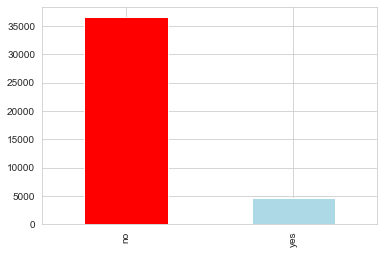

In [14]:
#plotting the same
df.y.value_counts().plot(kind="bar",color=['red','lightblue']);

In [15]:
#replacing yes & no with 1 & 0 respectively
df['y'] = df['y'].replace(['no','yes'],[0,1])

In [16]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

# DIFFERENTIATING CATEGORICAL & NUMERICAL

In [17]:
categorical=df.describe(include=['object']).T.index.tolist()

In [18]:
#continuous cols
continuous=[]
for col in df.columns:
    if len(df[col].unique()) <= 10:
        pass
    else:
        continuous.append(col)

In [19]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [20]:
continuous

['age',
 'job',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

# EXPLORATORY DATA ANALYSIS

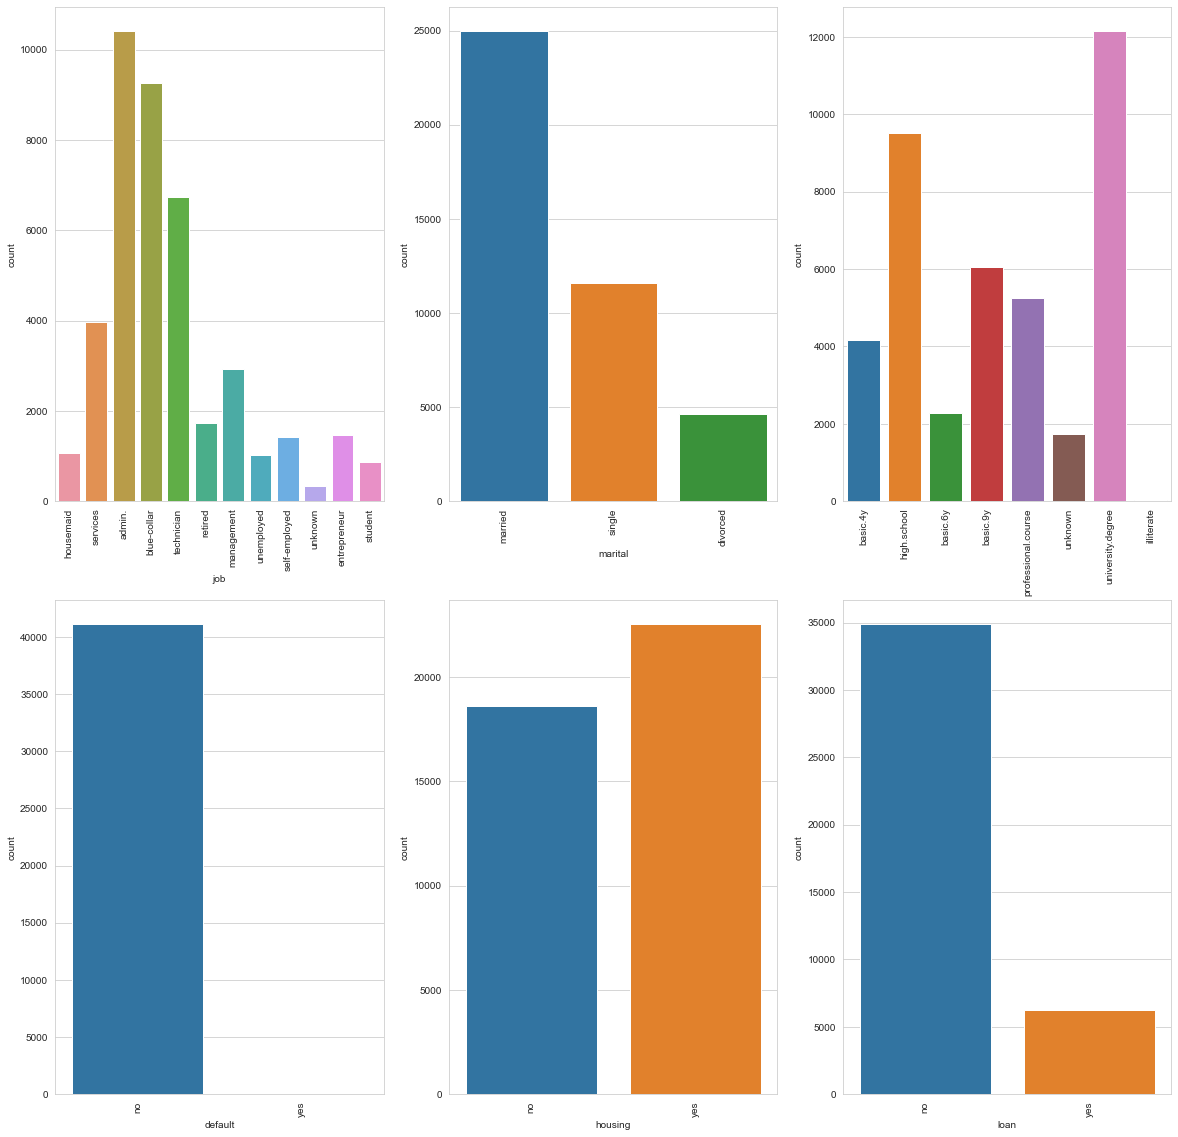

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    plt.xlabel(variable)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

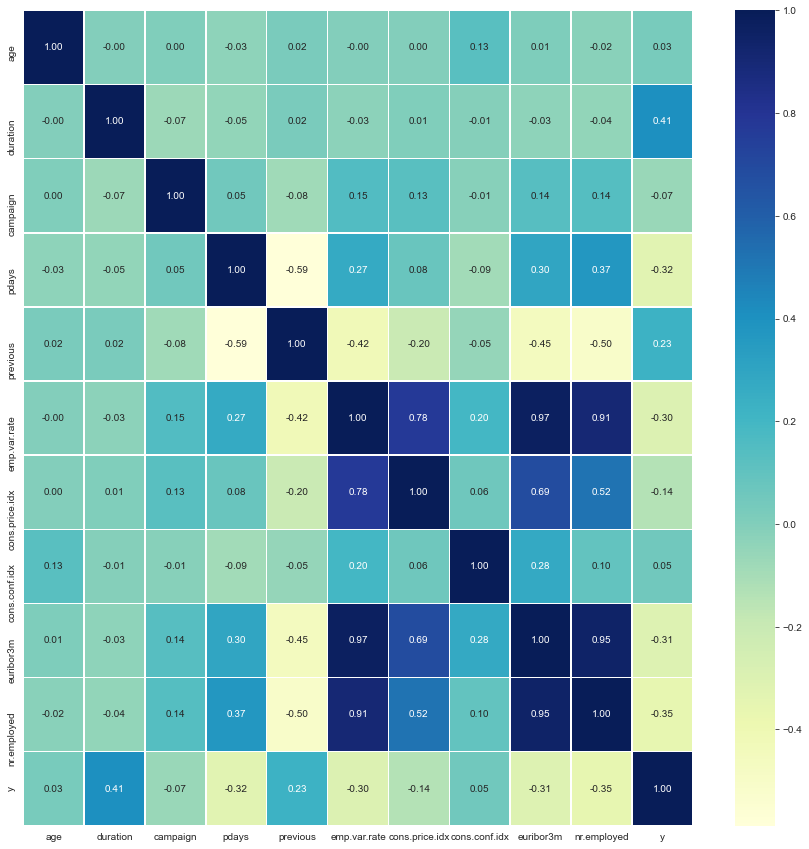

In [22]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

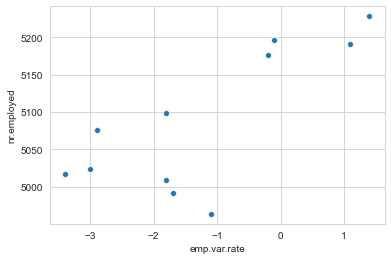

In [23]:
sns.scatterplot(x=df['emp.var.rate'], y=df['nr.employed']);

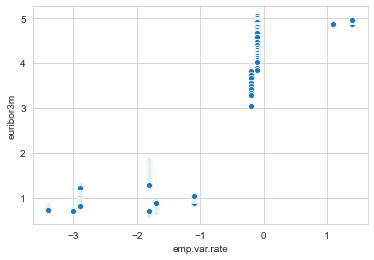

In [24]:
sns.scatterplot(x=df['emp.var.rate'], y=df['euribor3m']);

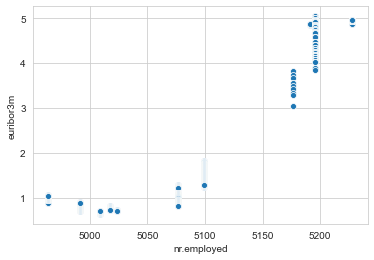

In [25]:
sns.scatterplot(x=df['nr.employed'], y=df['euribor3m']);

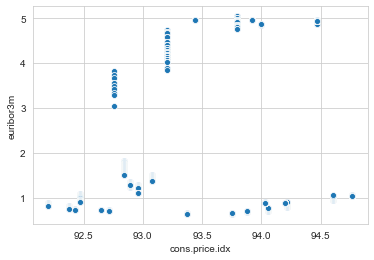

In [26]:
sns.scatterplot(x=df['cons.price.idx'], y=df['euribor3m']);

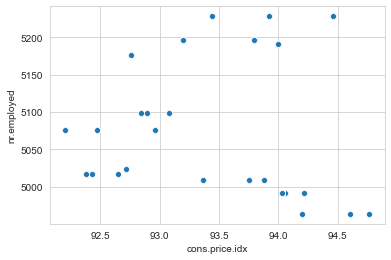

In [27]:
sns.scatterplot(x=df['cons.price.idx'], y=df['nr.employed']);

WE CAN SEE LINERAITY AMONG SOME VARIABLES FROM ABOVE EDA

# OUTLIER HANDLING

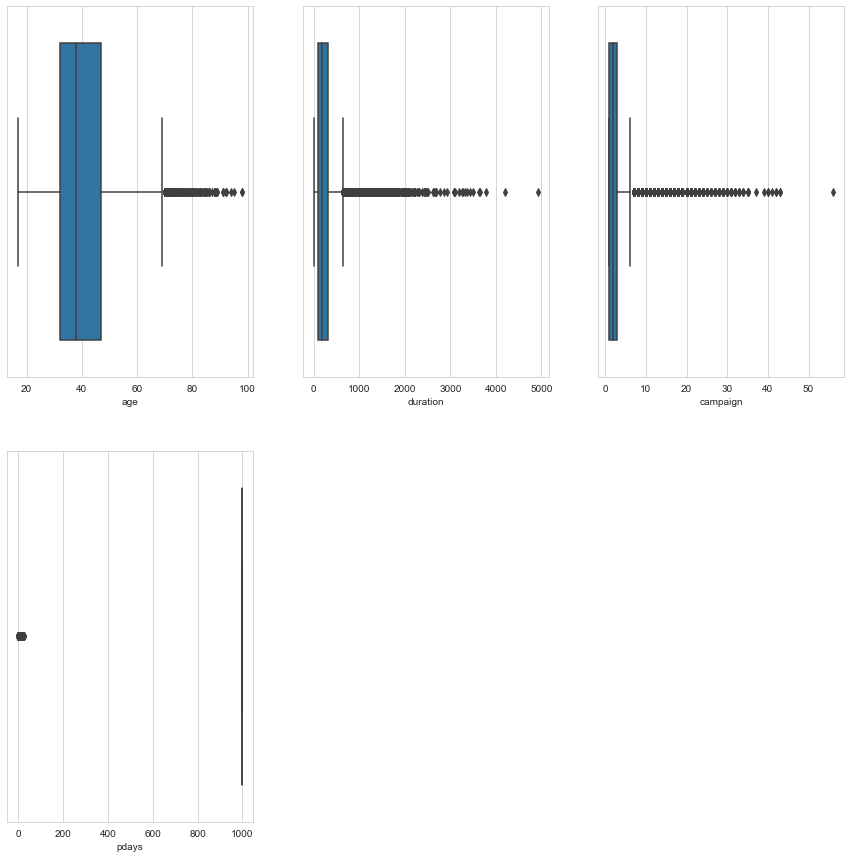

In [28]:
#checking for outliers in continuous data
plt.figure(figsize=(15, 15))
a=2
b=3
c=1
for i,col in enumerate(continuous, 1):
    if df.dtypes[col] == 'int64':
        plt.subplot(a, b, c)
        sns.boxplot(x=df[col])
        #plt.legend()
        plt.xlabel(col)
        c = c + 1

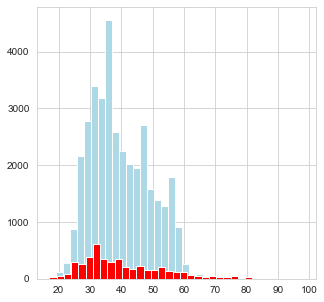

In [29]:
plt.figure(figsize=(5, 5))
df[df['y']==0]['age'].hist(bins=35,color='lightblue',label='Have heart Disease-->NO')
df[df['y']==1]['age'].hist(bins=35,color='red',label='Have heart Disease-->YES')

age is following gausian dist hence handling outlier as follows:

In [30]:
uppper_boundary=df['age'].mean() + 3* df['age'].std()
lower_boundary=df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(uppper_boundary),print(df['age'].mean())

8.760310463140776
71.28781034874618
40.02406040594348


(None, None, None)

In [31]:
df.loc[df['age']>=71,'age']=71

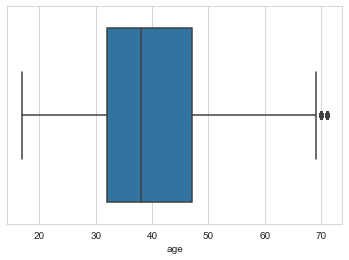

In [32]:
sns.boxplot(x=df['age'])

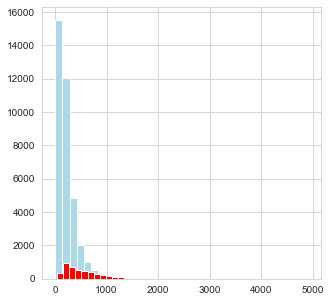

In [33]:
plt.figure(figsize=(5, 5))
df[df['y']==0]['duration'].hist(bins=35,color='lightblue',label='Have heart Disease-->NO')
df[df['y']==1]['duration'].hist(bins=35,color='red',label='Have heart Disease-->YES')

duration is skewed hence using IQR method fr handling outlier

In [34]:
IQR=df.duration.quantile(0.75)-df.duration.quantile(0.25)
lower_bridge=df['duration'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['duration'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-223.5
644.5


(None, None)

In [35]:
df.loc[data['duration']>=644,'duration']=644

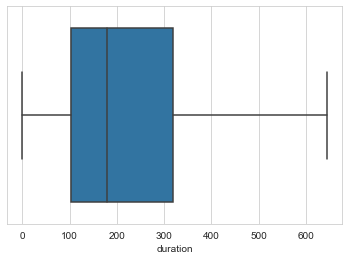

In [36]:
sns.boxplot(x=df['duration'])

# ONE HOT ENCODING CATEGORICAL VALUES

In [37]:
#converting categorical cols in dummies and scale them
dataset = pd.get_dummies(df, columns=categorical)

In [38]:
Y = dataset.y
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [39]:
X = dataset.drop('y', axis=1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


# HANDLING IMBALANCED PRESENCE WITH SMOTE

In [40]:
#imablanced --> balanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.4)
X_res, y_res = sm.fit_resample(X,Y)

In [41]:
from collections import Counter
Counter(y_res)

Counter({0: 36548, 1: 14619})

# TEST TRAIN SPLIT

In [42]:
#test-train-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.15, random_state=42)

# SCALING

In [43]:
cols_to_scale = ['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train[cols_to_scale]=sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale]=sc.transform(X_test[cols_to_scale])

In [44]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
24079,-0.092478,-0.354038,-0.544689,0.273944,0,-0.1,-0.552721,-0.333701,0.723694,0.527021,...,0,0,0,0,0,0,1,0,1,0
6433,1.128143,1.877075,-0.156554,0.273944,0,1.1,0.763824,0.802463,0.829492,0.467477,...,0,0,0,0,0,0,1,0,1,0
28824,-0.843629,-0.861110,-0.544689,0.273944,1,-1.8,-0.759986,-1.368421,-1.050316,-0.672545,...,0,0,0,0,1,0,0,1,0,0
27905,-0.374159,-0.911817,-0.544689,0.273944,0,-1.8,-1.144669,-1.956792,-0.980511,-0.672545,...,0,0,0,0,1,0,0,0,1,0
1616,0.095310,0.163174,-0.544689,0.273944,0,1.1,0.763824,0.802463,0.828401,0.467477,...,0,0,1,0,0,0,0,0,1,0


In [45]:
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [46]:
results_df = []

In [47]:
#result function:

plt.figure(figsize=(15, 15))
count = 0
train_score = 0
test_score = 0
def scores(clf, X_train, y_train, X_test, y_test):
    count = 1
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    train_score = accuracy_score(y_train, pred) * 100
    print("Train Result:\n================================================")
    print(f"Training Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    plt.subplot(2,2,count)
    plt.title('Training Confusion matrix')
    conf_matrix = confusion_matrix(y_train,pred)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f")
    count = 2
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    test_score = accuracy_score(y_test, pred) * 100
    print("Test Result:\n================================================")        
    print(f"Testing Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    roc_auc = roc_auc_score(y_test, pred)
    plt.subplot(2,2,count)
    plt.title('Testing Confusion matrix')
    conftest_matrix = confusion_matrix(y_test,pred)
    sns.heatmap(conftest_matrix, annot=True, fmt=".2f")
    results_df.append([clf,train_score,test_score,roc_auc])
    

<Figure size 1080x1080 with 0 Axes>

# #Logistic Regression

Train Result:
Training Accuracy Score: 92.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.926386      0.922483   0.92541      0.924434      0.925270
recall         0.972857      0.806885   0.92541      0.889871      0.925410
f1-score       0.949053      0.860820   0.92541      0.904937      0.923829
support    31058.000000  12433.000000   0.92541  43491.000000  43491.000000
_______________________________________________
Confusion Matrix: 
 [[30215   843]
 [ 2401 10032]]

Test Result:
Testing Accuracy Score: 92.68%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.928075     0.922917  0.926785     0.925496      0.926606
recall        0.973042     0.810613  0.926785     0.891827      0.926785
f1-score      0.950027     0.863127  0.926785     0.906577      0.925

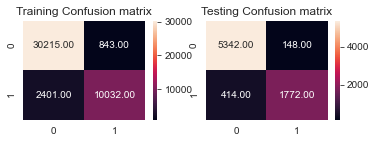

In [48]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
scores(lr, X_train, y_train, X_test, y_test)

# #knn

Train Result:
Training Accuracy Score: 94.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.970864      0.878184  0.942839      0.924524      0.944369
recall         0.948419      0.928899  0.942839      0.938659      0.942839
f1-score       0.959510      0.902830  0.942839      0.931170      0.943307
support    31058.000000  12433.000000  0.942839  43491.000000  43491.000000
_______________________________________________
Confusion Matrix: 
 [[29456  1602]
 [  884 11549]]

Test Result:
Testing Accuracy Score: 91.47%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.960739     0.815150  0.914669     0.887945      0.919278
recall        0.918215     0.905764  0.914669     0.911989      0.914669
f1-score      0.938996     0.858072  0.914669     0.898534      0.915

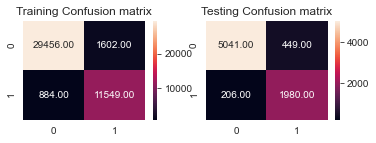

In [49]:
#knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
scores(knn, X_train, y_train, X_test, y_test)

# ADABOOST

Train Result:
Training Accuracy Score: 91.61%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.928359      0.881979  0.916098      0.905169      0.915100
recall         0.956308      0.815652  0.916098      0.885980      0.916098
f1-score       0.942126      0.847520  0.916098      0.894823      0.915081
support    31058.000000  12433.000000  0.916098  43491.000000  43491.000000
_______________________________________________
Confusion Matrix: 
 [[29701  1357]
 [ 2292 10141]]

Test Result:
Testing Accuracy Score: 91.40%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.928040     0.875123  0.914018     0.901581      0.912970
recall        0.953734     0.814273  0.914018     0.884003      0.914018
f1-score      0.940711     0.843602  0.914018     0.892157      0.913

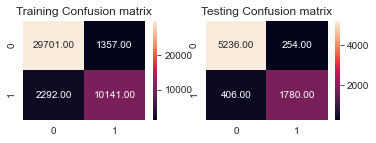

In [50]:
#  adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(X_train, y_train)

scores(abc, X_train, y_train, X_test, y_test)

# SVM

Train Result:
Training Accuracy Score: 92.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.917534      0.945284  0.924076      0.931409      0.925467
recall         0.981937      0.779538  0.924076      0.880738      0.924076
f1-score       0.948644      0.854448  0.924076      0.901546      0.921715
support    31058.000000  12433.000000  0.924076  43491.000000  43491.000000
_______________________________________________
Confusion Matrix: 
 [[30497   561]
 [ 2741  9692]]

Test Result:
Testing Accuracy Score: 92.24%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.917719     0.937294  0.922355     0.927507      0.923294
recall        0.979235     0.779506  0.922355     0.879370      0.922355
f1-score      0.947480     0.851149  0.922355     0.899314      0.920

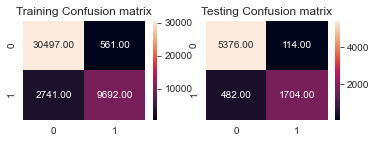

In [51]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

scores(svclassifier, X_train, y_train, X_test, y_test)

# RESULTS

In [52]:
results = pd.DataFrame(results_df, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','ROC_AUC_Score'])

In [53]:
results

,Model,Training Accuracy %,Testing Accuracy %,ROC_AUC_Score
0,LogisticRegression(),92.540985,92.678478,0.891827
1,KNeighborsClassifier(),94.283875,91.466910,0.911989
2,"(DecisionTreeClassifier(max_depth=1, random_st...",91.609758,91.401772,0.884003
3,SVC(kernel='linear'),92.407625,92.235539,0.879370


# SUMMARY
Here logistic regression can be considered as a good model as it gives good training as well as testing accuracy and the roc score too.